# ***Demo: Organizational Network Health Model***

This notebook provide examples of how to use network_health.py module for building, training and using an organizational network health model

## ***System Requirements***

In [1]:
# Intall package

!pip3 install ArviZ
!pip3 install PyMC3
!pip3 install Seaborn
!pip3 intall graphviz
!pip3 install rmtree


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip
ERROR: unknown command "intall" - maybe you meant "install"

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# Import modules and package
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from shutil import rmtree
from os import mkdir
from network_health import NetworkHealthModel, read_pickle_file, write_pickle_file
from network_health import ShapExplainer, generate_data

## ***Data Processing***

In [3]:
# Randomly generate synthetic data
num_people=500
data=generate_data(num_people)

# Export data to csv file and save it
data.to_csv('datasets/data.csv')

## ***Specify and Train a Network Health Model***

In [4]:
# Data, output and model paths
dataset_path='datasets'
output_path='outputs'
model_path=output_path + '/models'

In [5]:
# Import data
filename = dataset_path + "/data.csv"
data = pd.read_csv(filename)

In [6]:
# Define and fit a network health model
network_health_model = NetworkHealthModel(data)
network_health_model.fit(sample=2000, tune=1000)


WARNING (theano.tensor.opt): Optimization Warning: The Op erfcx does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
2022-07-28 19:09:42 - Optimization Warning: The Op erfcx does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
2022-07-28 19:09:42 - Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
2022-07-28 19:09:42 - Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
2022-07-28 19:10:13 - Multiprocess sampling (4 chains in 4 jobs)
NUTS: [std, weight, bias, alpha_health, gamma_index, alpha_qual, gamma_eff, alpha_ass, alpha_grp1, Sigma, alpha_ind1, gamma_inf]
2022-07-28 19:10:13 - NUTS: [st

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 188 seconds.
2022-07-28 19:13:23 - Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 188 seconds.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
2022-07-28 19:13:37 - There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
2022-07-28 19:13:37 - There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
2022-07-28 19:13:37 - There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
2022-07-28 19:13:37 - There were 9 divergences after tuning. Increase `target_accept` or reparameterize.


In [7]:
# Get the model graph
filename = output_path + "/model_graph"
network_health_model.to_graphviz(filename)

In [8]:
# Save the model
rmtree(model_path, ignore_errors=True)
mkdir(model_path)

write_pickle_file(model_path, network_health_model, "network_health_model")

## ***Use Network Health Model for Prediction***

In [9]:
# Load the model
output_path='outputs'
model_path=output_path +'/models'
network_health_model=read_pickle_file(model_path,'network_health_model')

In [23]:
# Define and train a network health classification model ( the classes depend on the user for example we may consider classes=["poor", "good"])
person_ids=np.arange(0,500,1)
classes = ["poor",'fair', "good"]

network_health_model.get_classes(person_ids, classes)

2022-07-28 19:46:54 - The optimal classification is obtained


In [26]:
# Get in-sample prediction of network health for a group of people
'''NB: For good practices, always ensure that you are using the correct classification for predict'''
pd.options.display.float_format = '{:.2f}'.format

person_ids=np.arange(100,200,1)

stats, proba=network_health_model.in_sample_predict(person_ids)
results=stats.join(proba, lsuffix='_1')
results.drop(columns=['status_1'], inplace=True)
results.head()

,mean,sd,hdi_3%,hdi_97%,poor,fair,good,status
network_health[100],0.58,0.23,0.17,1.01,0.00,0.42,0.58,good
network_health[101],0.57,0.24,0.15,1.02,0.00,0.06,0.94,good
network_health[102],0.49,0.20,0.09,0.86,1.00,0.00,0.00,poor
network_health[103],0.56,0.23,0.17,1.00,0.03,0.62,0.35,fair
network_health[104],0.57,0.22,0.19,0.99,0.02,0.97,0.00,fair


In [25]:
# Get out-sample prediction of network health for a group of people (using predict method)
'''NB: For good practices, always ensure that you are using the correct classification for predict'''

pd.options.display.float_format = '{:.2f}'.format

p_data=data.loc[100:200]

stats, proba=network_health_model.predict(p_data)
results=stats.join(proba, lsuffix='_1')
results.drop(columns=['status_1'], inplace=True)
results.head()

,mean,sd,hdi_3%,hdi_97%,poor,fair,good,status
network_health[100],0.58,0.23,0.17,1.01,0.00,0.42,0.58,good
network_health[101],0.57,0.24,0.15,1.02,0.00,0.06,0.94,good
network_health[102],0.49,0.20,0.09,0.86,1.00,0.00,0.00,poor
network_health[103],0.56,0.23,0.17,1.00,0.03,0.62,0.35,fair
network_health[104],0.57,0.22,0.19,0.99,0.02,0.97,0.00,fair


In [13]:
# Get out-sample prediction of network health for a group of people ( using predict2 method)
'''NB: For good practices, always ensure that you are using the correct classification for predict'''
pd.options.display.float_format = '{:.2f}'.format

p_data=data.loc[100:200]

stats, proba=network_health_model.predict2(p_data)
results=stats.join(proba, lsuffix='_1')
results.drop(columns=['status_1'], inplace=True)
results.head()

,mean,sd,hdi_3%,hdi_97%,poor,fair,good,status
network_health[100],0.58,0.23,0.17,1.01,0.00,0.44,0.56,good
network_health[101],0.57,0.24,0.15,1.02,0.00,0.07,0.93,good
network_health[102],0.49,0.20,0.09,0.86,1.00,0.00,0.00,poor
network_health[103],0.56,0.23,0.17,1.00,0.03,0.64,0.33,fair
network_health[104],0.57,0.22,0.19,0.99,0.02,0.98,0.00,fair


In [22]:
# Get in-sample prediction of other variables in the model for a group of people
''' choose the variable'''
var_names=['accessibility']

''' choose the desired classes and train a classification model'''
classes = ["poor",'fair', "good"]

person_ids=np.arange(0,500,1)
network_health_model.get_classes(person_ids, classes, var_names=var_names)

'''Get in-sample prediction for a group of people'''
pd.options.display.float_format = '{:.2f}'.format

person_ids=np.arange(100,200,1)

stats, proba=network_health_model.in_sample_predict(person_ids, var_names=var_names)
results=stats.join(proba, lsuffix='_1')
results.drop(columns=['status_1'], inplace=True)
results.head()




Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
2022-07-28 19:45:48 - The optimal classification is obtained


,mean,sd,hdi_3%,hdi_97%,poor,fair,good,status
accessibility[100],0.67,0.23,0.34,1.00,0.54,0.01,0.45,poor
accessibility[101],0.67,0.23,0.34,1.00,0.15,0.00,0.85,good
accessibility[102],0.67,0.23,0.34,1.00,0.13,0.00,0.87,good
accessibility[103],0.67,0.23,0.34,1.00,0.16,0.00,0.84,good
accessibility[104],0.67,0.23,0.34,1.00,0.74,0.00,0.25,poor


In [15]:
# Get out-sample prediction of other variables in the model for a group of people ( using predict method)
''' choose the variable'''
var_names=['accessibility']

''' choose the desired classes and train a classification model'''
classes = ["poor",'fair', "good"]

person_ids=np.arange(0,500,1)
network_health_model.get_classes(person_ids, classes, var_names=var_names)

'''Get out-sample prediction for a group of people'''
pd.options.display.float_format = '{:.2f}'.format

p_data=data.loc[100:200]

stats, proba=network_health_model.predict(p_data, var_names=var_names)
results=stats.join(proba, lsuffix='_1')
results.drop(columns=['status_1'], inplace=True)
results.head()

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
2022-07-28 19:17:06 - The optimal classification is obtained


,mean,sd,hdi_3%,hdi_97%,poor,fair,good,status
accessibility[100],0.67,0.23,0.34,1.00,0.20,0.00,0.80,good
accessibility[101],0.67,0.23,0.34,1.00,0.03,0.00,0.97,good
accessibility[102],0.67,0.23,0.34,1.00,0.02,0.00,0.98,good
accessibility[103],0.67,0.23,0.34,1.00,0.03,0.00,0.97,good
accessibility[104],0.67,0.23,0.34,1.00,0.36,0.00,0.64,good


In [16]:
# Get out-sample prediction of other variables in the model for a group of people ( using predict2 method)
''' choose the variable'''
var_names=['accessibility']

''' choose the desired classes and train a classification model'''
classes = ["poor",'fair', "good"]

person_ids=np.arange(0,500,1)
network_health_model.get_classes(person_ids, classes, var_names=var_names)

'''Get out-sample prediction for a group of people'''
pd.options.display.float_format = '{:.2f}'.format

p_data=data.loc[100:200]

stats, proba=network_health_model.predict2(p_data, var_names=var_names)
results=stats.join(proba, lsuffix='_1')
results.drop(columns=['status_1'], inplace=True)
results.head()

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
2022-07-28 19:17:44 - The optimal classification is obtained


,mean,sd,hdi_3%,hdi_97%,poor,fair,good,status
accessibility[100],0.67,0.23,0.34,1.00,0.14,0.00,0.86,good
accessibility[101],0.67,0.23,0.34,1.00,0.01,0.00,0.98,good
accessibility[102],0.67,0.23,0.34,1.00,0.01,0.00,0.99,good
accessibility[103],0.67,0.23,0.34,1.00,0.02,0.00,0.98,good
accessibility[104],0.67,0.23,0.34,1.00,0.28,0.00,0.72,good


In [17]:
# Extract network health indicators 
''' This method works when people information is already in the system. It works exclusively for the network health variable'''
pd.options.display.float_format = '{:.2f}'.format

person_ids=np.arange(100,200,1)

stats=network_health_model.extract_stats(person_ids)
proba=network_health_model.extract_proba(person_ids)

results=stats.join(proba, lsuffix='_1')
results.drop(columns=['status_1'], inplace=True)
results.head()

,mean,sd,hdi_3%,hdi_97%,poor,fair,good,status
100,0.58,0.23,0.17,1.01,0.00,0.44,0.56,good
101,0.57,0.24,0.15,1.02,0.00,0.07,0.93,good
102,0.49,0.20,0.09,0.86,1.00,0.00,0.00,poor
103,0.56,0.23,0.17,1.00,0.03,0.64,0.33,fair
104,0.57,0.22,0.19,0.99,0.02,0.98,0.00,fair


## ***Explainability of Network Health Model Predictions***

In [27]:
# Get an instance of shaply explainer(we reduce the size of the trace with num_draws=30)
X_train=data.loc[1:100] #sample data to get the distribution
shap_explainer=ShapExplainer(network_health_model,X_train, num_draws=100)

In [28]:
# Get shapley values for a group of people
sample=data.loc[1:6]
shap_values=shap_explainer.get_shap_values(sample)

Permutation explainer:  17%|█▋        | 1/6 [00:00<?, ?it/s]

Permutation explainer:  50%|█████     | 3/6 [05:09<03:53, 77.85s/it]

Permutation explainer:  67%|██████▋   | 4/6 [07:59<03:52, 116.19s/it]

Permutation explainer:  83%|████████▎ | 5/6 [10:41<02:13, 133.15s/it]

Permutation explainer: 100%|██████████| 6/6 [13:24<00:00, 143.60s/it]

Permutation explainer: 7it [16:11, 161.85s/it]                       


Features'Impact on network_health output (mean): Person Id=1


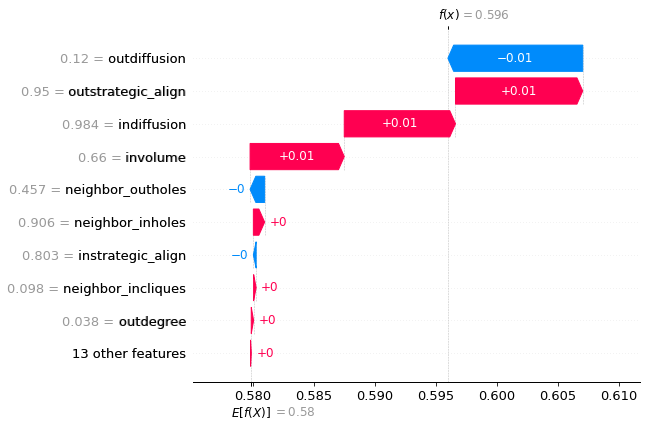

In [29]:
# Display shapley values for a given individual
sample_id=1
shap_explainer.display_local_shap_values(sample_id, max_display=10)

Features'Impact on network_health output (mean): Mean Absolute Impact


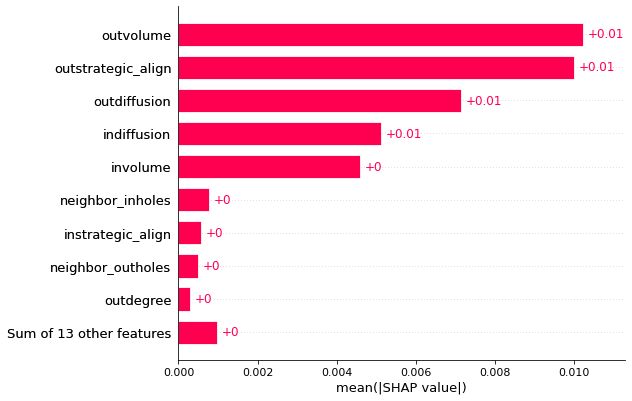

Features'Impact on network_health output (mean): Level Impact


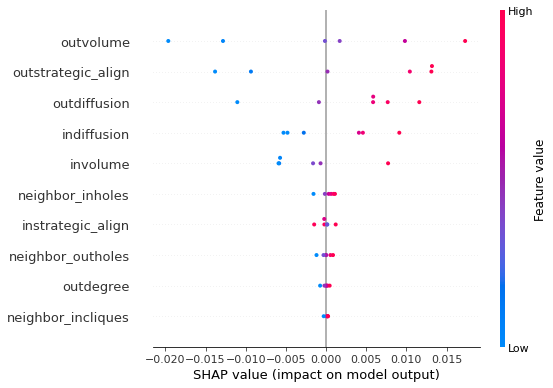

In [30]:
# Display shapley values for the group
shap_explainer.display_global_shap_values(max_display=10)

In [19]:
# Get an instance of shaply explainer
X_train=data.loc[1:100] #sample data to get the distribution
shap_explainer=ShapExplainer(network_health_model,X_train)

In [20]:
# Get shapley values for a group of people
sample=data.loc[1:6]
shap_values=shap_explainer.get_shap_values(sample)

Permutation explainer:  17%|█▋        | 1/6 [00:00<?, ?it/s]

Permutation explainer:  50%|█████     | 3/6 [27:03<20:41, 413.73s/it]

Permutation explainer:  67%|██████▋   | 4/6 [40:49<19:30, 585.41s/it]

Permutation explainer:  83%|████████▎ | 5/6 [54:32<11:13, 673.85s/it]

Permutation explainer: 100%|██████████| 6/6 [1:08:22<00:00, 728.27s/it]

Permutation explainer: 7it [1:22:20, 823.49s/it]                       


Features'Impact on network_health output (mean): Person Id=1


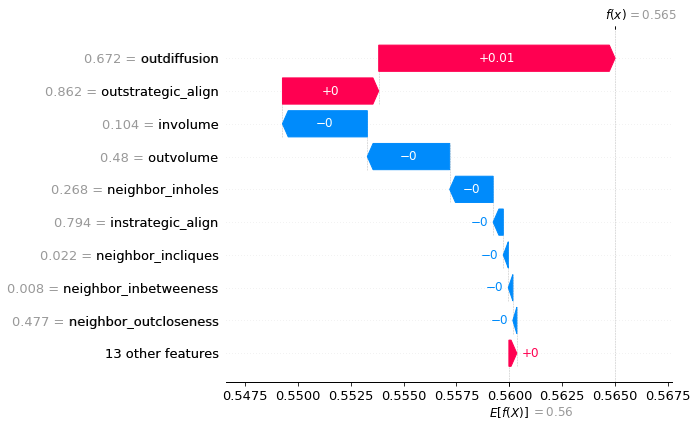

In [21]:
# Display shapley values for a given individual
sample_id=1
shap_explainer.display_local_shap_values(sample_id, max_display=10)

Features'Impact on network_health output (mean): Mean Absolute Impact


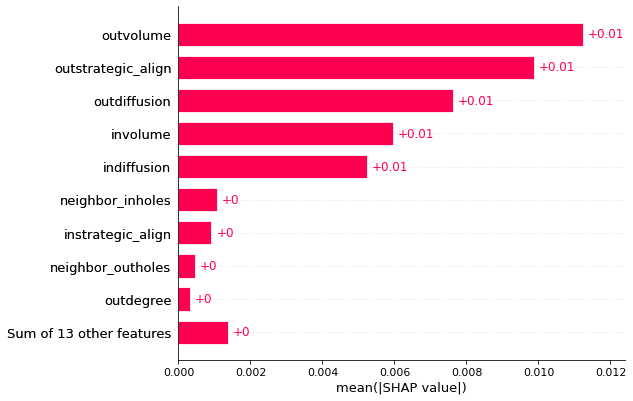

Features'Impact on network_health output (mean): Level Impact


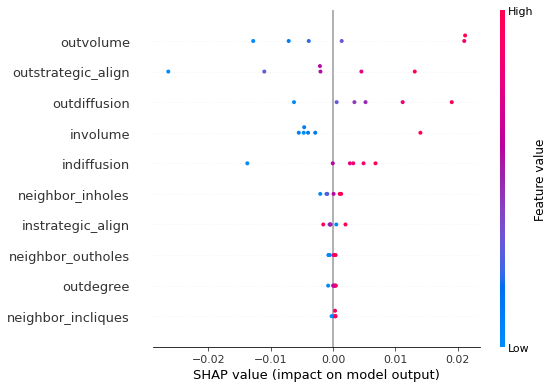

In [22]:
# Display shapley values for the group
shap_explainer.display_global_shap_values(max_display=10)